Robots are smart… by design. To fully understand and properly navigate a task, 
however, they need input about their environment.

In this competition, you’ll help robots recognize the floor surface they’re standing 
on using data collected from Inertial Measurement Units (IMU sensors).

We’ve collected IMU sensor data while driving a small mobile robot over different floor surfaces on the university premises.
The task is to predict which one of the nine floor types (carpet, tiles, concrete) the robot is on using sensor data such as 
acceleration and velocity. Succeed and you'll help improve the navigation of robots without assistance across many different 
surfaces, so they won’t fall down on the job.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
test = pd.read_csv('X_test.csv')
x_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [3]:
test.head(5)

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0      -0.025773       -0.98864   
1    0_1          0                   1      -0.025683       -0.98862   
2    0_2          0                   2      -0.025617       -0.98861   
3    0_3          0                   3      -0.025566       -0.98862   
4    0_4          0                   4      -0.025548       -0.98866   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.14801       0.003350           -0.006524           -0.001071   
1       -0.14816       0.003439           -0.113960            0.083987   
2       -0.14826       0.003571           -0.080518            0.114860   
3       -0.14817       0.003609            0.070067            0.033820   
4       -0.14792       0.003477            0.152050           -0.029016   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0           -0.027390                0.10043                 4.2061   
1           -0.060590               -0.70889                 3.9905   
2           -0.037177                1.45710                 2.2828   
3           -0.035904                0.71096                 1.8582   
4           -0.015314                3.39960                 2.7881   

   linear_acceleration_Z  
0                -5.5439  
1                -8.0273  
2               -11.2990  
3               -12.2270  
4               -10.4100

In [4]:
x_train.head(5)

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.000767               -0.74857                 2.1030   
1            0.003385                0.33995                 1.5064   
2           -0.005978               -0.26429                 1.5922   
3           -0.008974                0.42684                 1.0993   
4            0.005245               -0.50969                 1.4689   

   linear_acceleration_Z  
0                -9.7532  
1                -9.4128  
2                -8.7267  
3               -10.0960  
4               -10.4410

The below steps are carried out in order to make one variable for velocity and acceleration

In [5]:
def vector_norm(x,y,z,df):
    return np.sqrt(df[x]**2 + df[y]**2 + df[z]**2)

#now combine all the x, y and z dimensions of velocity and acceleration to make 1 column 
x_train['angular_velocity_norm'] =vector_norm('angular_velocity_X',
                                                'angular_velocity_Y',
                                                'angular_velocity_Z',x_train)

x_train['linear_acceleration_norm'] =vector_norm('linear_acceleration_X',
                                                'linear_acceleration_Y',
                                                'linear_acceleration_Z',x_train)

def vector_norm(x,y,z,w, df):
    return np.sqrt(df[x]**2 + df[y]**2 + df[z]**2 + df[w]**2)

x_train['orientation'] =vector_norm('orientation_Z',
                                                'orientation_Y',
                                                'orientation_X', 'orientation_W', x_train)
x_train.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.000767               -0.74857                 2.1030   
1            0.003385                0.33995                 1.5064   
2           -0.005978               -0.26429                 1.5922   
3           -0.008974                0.42684                 1.0993   
4            0.005245               -0.50969                 1.4689   

   linear_acceleration_Z  angular_velocity_norm  linear_acceleration_norm  \
0                -9.7532               0.109076                 10.005392   
1                -9.4128               0.074240                  9.538638   
2                -8.7267               0.030428                  8.874697   
3               -10.0960               0.025082                 10.164638   
4               -10.4410               0.010603                 10.556132   

   orientation  
0     0.999999  
1     0.999998  
2     1.000003  
3     1.000005  
4     0.999997

In [6]:
x_train_ok = x_train[x_train.angular_velocity_norm <= 1.0]
x_train_ok = x_train_ok[x_train_ok.linear_acceleration_norm <= 40.0]

The below scatterplot shows how velocity and acceleration are related to one another. 
As there are so many points of observation,the scatterplot looks busy (AFTER REMOVING OUTLIERS)

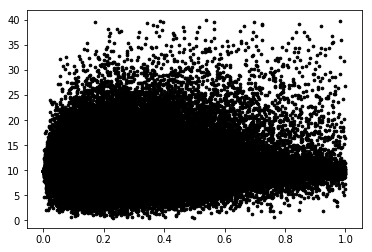

In [7]:
# Getting the values and plotting it
f1 = x_train_ok['angular_velocity_norm'].values
f2 = x_train_ok['linear_acceleration_norm'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

The below scatterplot shows how velocity and acceleration are related to one another. 
As there are so many points of observation,the scatterplot looks busy (BEFORE REMOVING OUTLIERS)

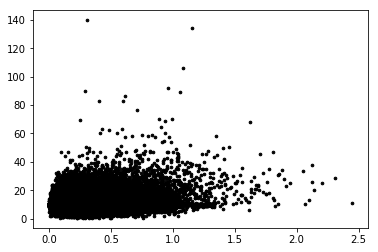

In [8]:
# Getting the values and plotting it
f1 = x_train['angular_velocity_norm'].values
f2 = x_train['linear_acceleration_norm'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

Cluster Analysis done below - in order to assign a correct surface based on the robot's movement, velocity and acc.

In [9]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)
print(labels)

[[ 0.19618392  7.22592227]
 [ 0.1883232  12.08679995]
 [ 0.19656356  9.81302338]
 [ 0.26684188 16.53203464]
 [ 0.44770738 26.71150134]]
[2 2 2 ... 2 2 1]


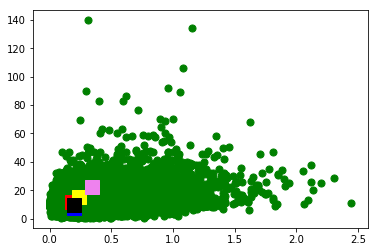

In [10]:
plt.scatter(X[ : , 0], X[ : , 1], c= 'green', s =50)
plt.scatter( 0.18369482 ,11.65854137, s=200, c='red', marker='s')
plt.scatter(0.19661769 , 7.13244426, s=200, c='blue', marker='s')
plt.scatter( 0.24044923 ,15.19155909 , s=200, c='yellow', marker='s')
plt.scatter( 0.19637393  , 9.72402908 , s=200, c='black', marker='s')
plt.scatter( 0.34620376, 22.53920881 , s=200, c='violet', marker='s')
plt.show()

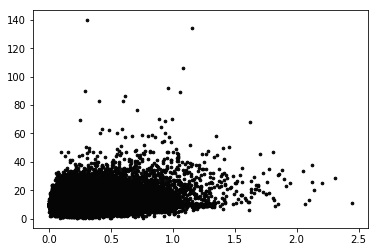

In [11]:
plt.scatter(f1, f2, c='#050505', s=7)

2nd approach K MEANS

In [12]:
x_train_copy = x_train[['series_id', 'angular_velocity_norm','linear_acceleration_norm' , 'orientation']]
x_train_copy_mean = x_train_copy.groupby('series_id').mean()
x_train_copy_mean.head(2)

angular_velocity_norm  linear_acceleration_norm  orientation
series_id                                                              
0                       0.057668                  9.939676          1.0
1                       0.111790                 10.082444          1.0

In [13]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(x_train_copy_mean)
#let's get the labels as a dataframe and create the column for series_id so we can merge it
labels_clus = pd.DataFrame(kmeans.labels_)
labels_clus['series_id'] = range(y_train.shape[0])
labels_clus.columns = ['labels', 'series_id']
response_labeled = pd.merge(y_train, labels_clus, on='series_id')
freq_catlabel = response_labeled.groupby('labels')['surface'].value_counts()
freq_catlabel

labels  surface               
0       concrete                  328
        tiled                     203
        fine_concrete             107
        soft_pvc                   61
        wood                       41
        hard_tiles_large_space     30
        carpet                     25
        soft_tiles                  5
1       hard_tiles_large_space    100
        concrete                   79
        tiled                      53
        wood                       40
        carpet                      8
        soft_pvc                    4
        fine_concrete               3
2       concrete                   10
        carpet                      1
3       hard_tiles_large_space     47
        concrete                   37
        carpet                      6
        tiled                       6
        fine_concrete               1
        soft_tiles                  1
        wood                        1
4       wood                      196
        concrete   

In [14]:
freq_labels_dict = ({0:'concrete', 1:'soft_pvc',2:'wood', 3:'concrete',
                    4:'soft_pvc',5:'concrete',6:'tiled',7:'soft_tiles', 8:'tiled'})
freq_labels_dict

{0: 'concrete',
 1: 'soft_pvc',
 2: 'wood',
 3: 'concrete',
 4: 'soft_pvc',
 5: 'concrete',
 6: 'tiled',
 7: 'soft_tiles',
 8: 'tiled'}

running on test data to see how well our model has predicted 

In [15]:
data_test_cluster = test.drop(['measurement_number', 'row_id'],axis=1)
data_test_cluster_group = data_test_cluster.groupby('series_id').mean()
data_test_cluster_group.head(5)

orientation_X  orientation_Y  orientation_Z  orientation_W  \
series_id                                                               
0              -0.025810      -0.988644      -0.148006       0.003147   
1              -0.932288       0.330271       0.043416      -0.140968   
2              -0.230186       0.961448       0.144340      -0.042394   
3               0.164661       0.975293       0.146153       0.018096   
4              -0.253600       0.955712       0.142326      -0.044067   

           angular_velocity_X  angular_velocity_Y  angular_velocity_Z  \
series_id                                                               
0                    0.000994            0.002629           -0.002971   
1                    0.010602            0.014625           -0.036900   
2                   -0.003484            0.009079           -0.026607   
3                    0.004221           -0.006815            0.026272   
4                    0.005279            0.069537           -0.211458   

           linear_acceleration_X  linear_acceleration_Y  linear_acceleration_Z  
series_id                                                                       
0                       0.141545               2.876786              -9.325264  
1                       0.022906               2.922706              -9.345727  
2                       0.222549               2.925039              -9.456413  
3                       0.164520               2.966581              -9.357768  
4                       0.061617               2.744313              -9.396443

In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 16 columns):
row_id                      487680 non-null object
series_id                   487680 non-null int64
measurement_number          487680 non-null int64
orientation_X               487680 non-null float64
orientation_Y               487680 non-null float64
orientation_Z               487680 non-null float64
orientation_W               487680 non-null float64
angular_velocity_X          487680 non-null float64
angular_velocity_Y          487680 non-null float64
angular_velocity_Z          487680 non-null float64
linear_acceleration_X       487680 non-null float64
linear_acceleration_Y       487680 non-null float64
linear_acceleration_Z       487680 non-null float64
angular_velocity_norm       487680 non-null float64
linear_acceleration_norm    487680 non-null float64
orientation                 487680 non-null float64
dtypes: float64(13), int64(2), object(1)
memory usage: 59.5+ M

In [18]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 3 columns):
series_id    3810 non-null int64
group_id     3810 non-null int64
surface      3810 non-null object
dtypes: int64(2), object(1)
memory usage: 89.4+ KB


In [19]:
y_train.head(5)

series_id  group_id        surface
0          0        13  fine_concrete
1          1        31       concrete
2          2        20       concrete
3          3        31       concrete
4          4        22     soft_tiles

In [20]:
x_train.row_id.nunique()

487680

In [21]:
x_train.series_id.nunique()

3810

In [22]:
x_train.measurement_number.nunique()

128

Each series has 128 measurements

In [23]:
y_train.head(5)

series_id  group_id        surface
0          0        13  fine_concrete
1          1        31       concrete
2          2        20       concrete
3          3        31       concrete
4          4        22     soft_tiles

In [24]:
y_train.groupby('series_id').first()['surface'].value_counts()

concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64

EDA BELOW -

The graph below shows that a large of observations are recorded for the robot on a concrete floor

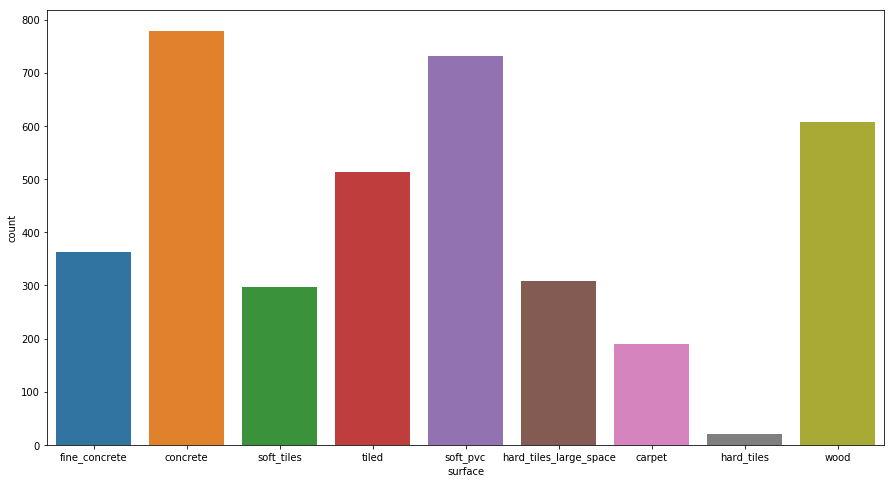

In [25]:
plt.figure(figsize=(15,8))
sns.countplot( x = 'surface', data = y_train)

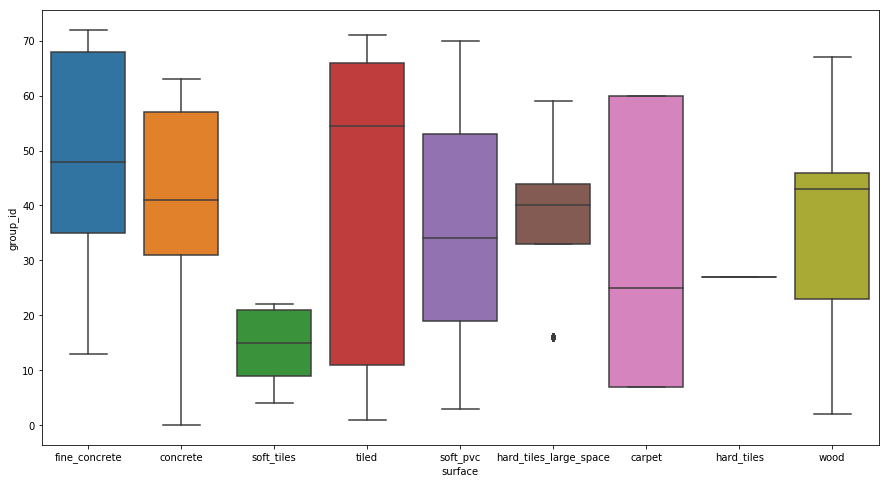

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot( x ='surface',y = 'group_id', data = y_train)

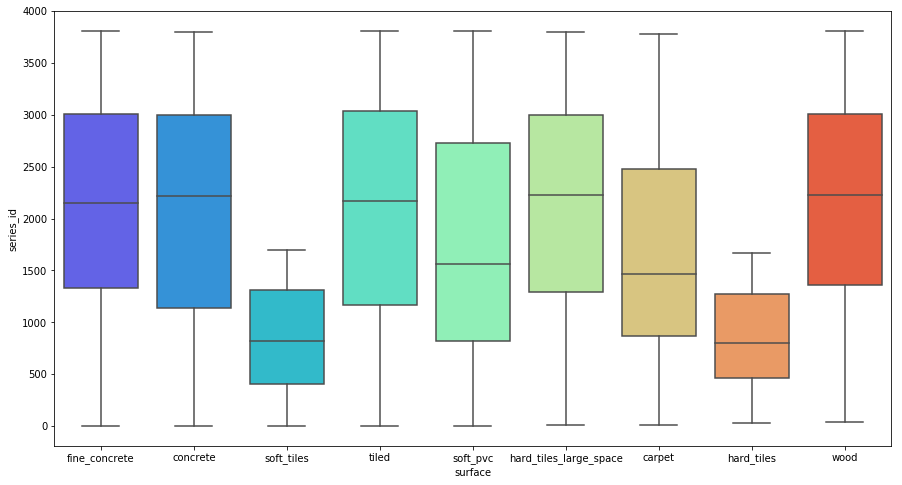

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot( x ='surface',y = 'series_id', data = y_train, palette = 'rainbow')

The below shows distribution histrogram plot for all the train variables to understand if they are or arent normally
distributed

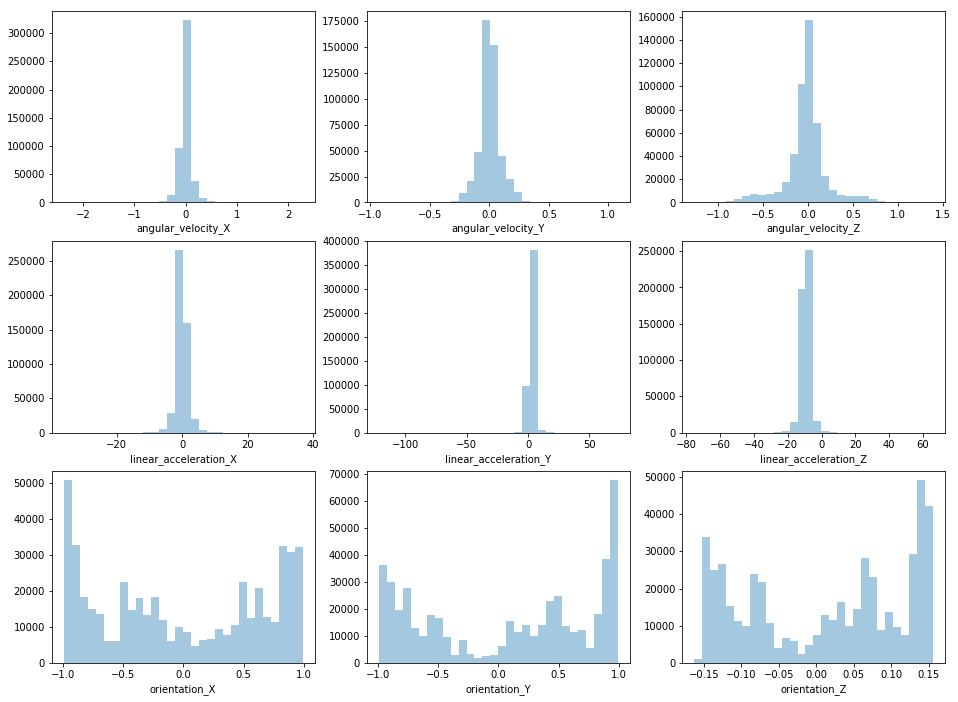

In [28]:
fig, ax = plt.subplots(3, 3, figsize = (16, 12))
sns.distplot(x_train['angular_velocity_X'], kde= False, bins=30, ax=ax[0][0])
sns.distplot(x_train['angular_velocity_Y'], kde= False, bins=30, ax=ax[0][1])
sns.distplot(x_train['angular_velocity_Z'], kde= False, bins=30, ax=ax[0][2])
sns.distplot(x_train['linear_acceleration_X'], kde= False, bins=30, ax=ax[1][0])
sns.distplot(x_train['linear_acceleration_Y'], kde= False, bins=30, ax=ax[1][1])
sns.distplot(x_train['linear_acceleration_Z'], kde= False, bins=30, ax=ax[1][2])
sns.distplot(x_train['orientation_X'], kde= False, bins=30, ax=ax[2][0])
sns.distplot(x_train['orientation_Y'], kde= False, bins=30, ax=ax[2][1])
sns.distplot(x_train['orientation_Z'], kde= False, bins=30, ax=ax[2][2])

In [29]:
x_train_2 = x_train.drop(['row_id','series_id', 'measurement_number'], axis=1)

In [30]:
x_train_2 .head(5)

orientation_X  orientation_Y  orientation_Z  orientation_W  \
0       -0.75853       -0.63435       -0.10488       -0.10597   
1       -0.75853       -0.63434       -0.10490       -0.10600   
2       -0.75853       -0.63435       -0.10492       -0.10597   
3       -0.75852       -0.63436       -0.10495       -0.10597   
4       -0.75852       -0.63435       -0.10495       -0.10596   

   angular_velocity_X  angular_velocity_Y  angular_velocity_Z  \
0            0.107650            0.017561            0.000767   
1            0.067851            0.029939            0.003385   
2            0.007275            0.028934           -0.005978   
3           -0.013053            0.019448           -0.008974   
4            0.005135            0.007652            0.005245   

   linear_acceleration_X  linear_acceleration_Y  linear_acceleration_Z  \
0               -0.74857                 2.1030                -9.7532   
1                0.33995                 1.5064                -9.4128   
2               -0.26429                 1.5922                -8.7267   
3                0.42684                 1.0993               -10.0960   
4               -0.50969                 1.4689               -10.4410   

   angular_velocity_norm  linear_acceleration_norm  orientation  
0               0.109076                 10.005392     0.999999  
1               0.074240                  9.538638     0.999998  
2               0.030428                  8.874697     1.000003  
3               0.025082                 10.164638     1.000005  
4               0.010603                 10.556132     0.999997

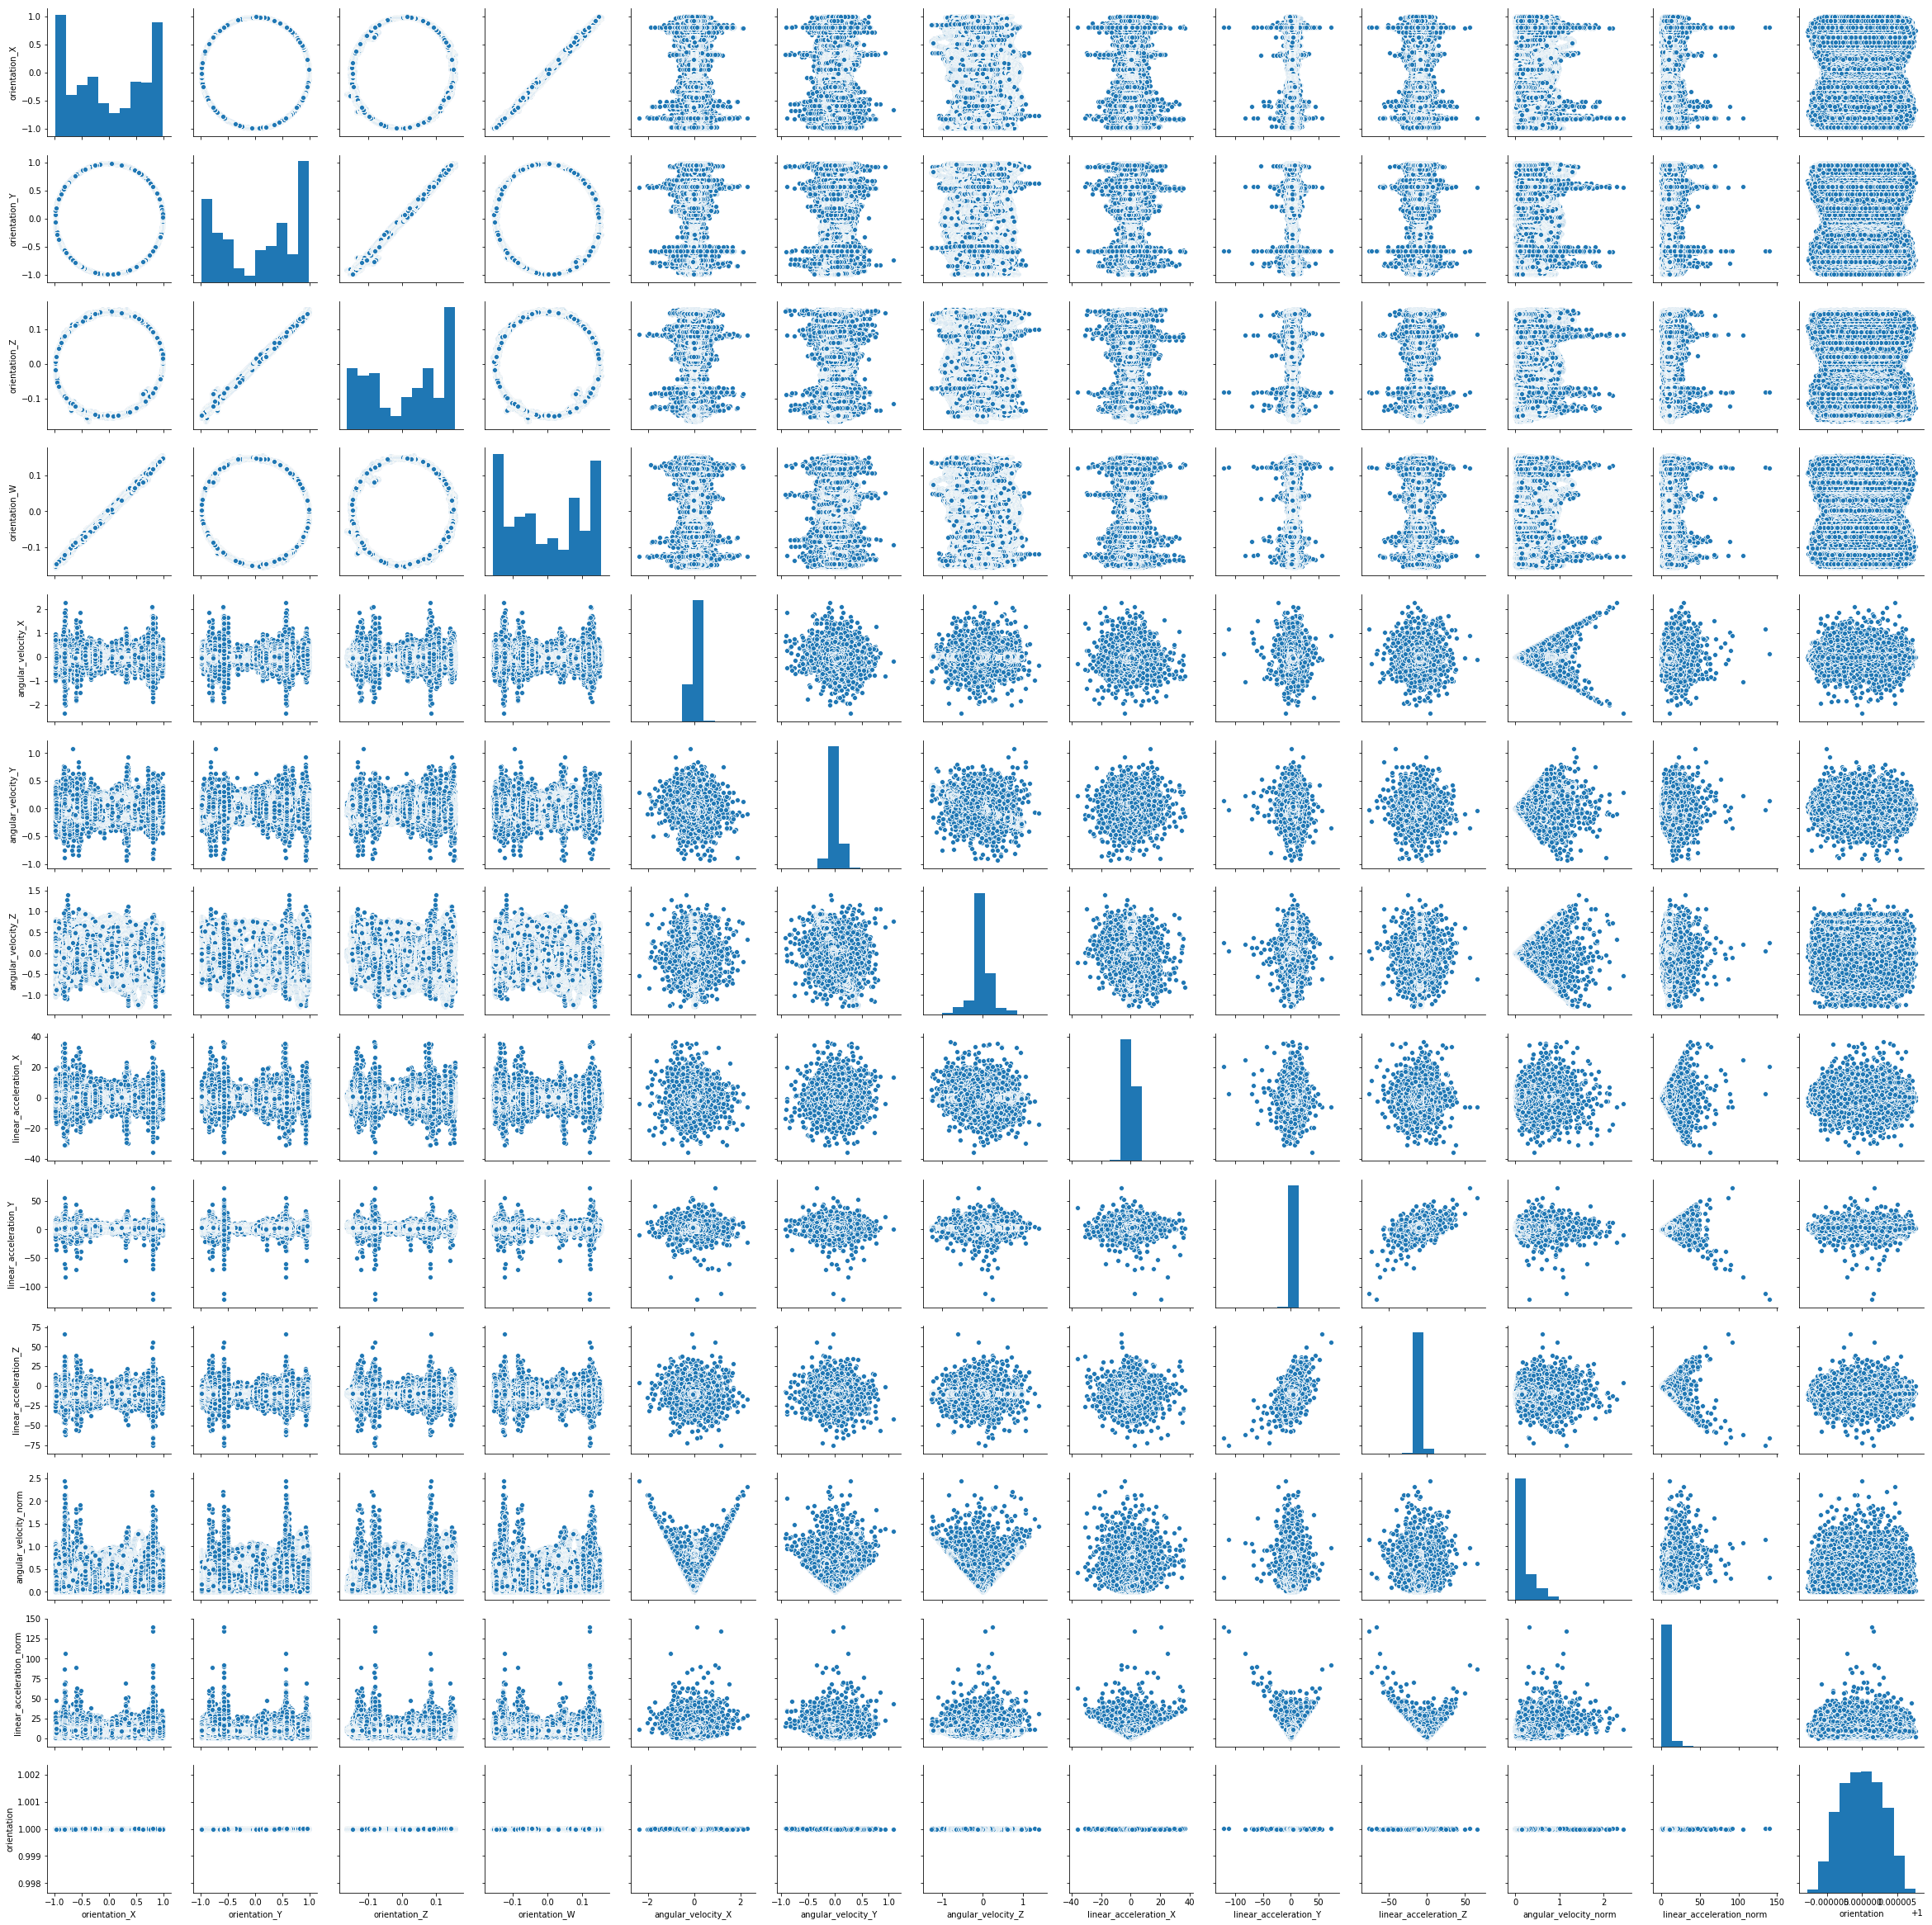

In [31]:
sns.pairplot(x_train_2)
#the pairplot chart helps in plotting all the possible combinations of scatterplots for variables in the train dataset

In [32]:
#Function to calculate the norm of a three element vector so as to make a velocity column 
def vector_norm(x,y,z,df):
    return np.sqrt(df[x]**2 + df[y]**2 + df[z]**2)

#now combine all the x, y and z dimensions of velocity and acceleration to make 1 column 
x_train['angular_velocity_norm'] =vector_norm('angular_velocity_X',
                                                'angular_velocity_Y',
                                                'angular_velocity_Z',x_train)

x_train['linear_acceleration_norm'] =vector_norm('linear_acceleration_X',
                                                'linear_acceleration_Y',
                                                'linear_acceleration_Z',x_train)

#group by series id to get an avergae value of for every series id
new_x_train = x_train.groupby('series_id')['angular_velocity_norm','linear_acceleration_norm'].mean()
new_x_train.head(5)




angular_velocity_norm  linear_acceleration_norm
series_id                                                 
0                       0.057668                  9.939676
1                       0.111790                 10.082444
2                       0.071090                 10.035741
3                       0.156050                 10.888094
4                       0.157866                  9.892815

In [33]:
new_x_train  = pd.DataFrame(new_x_train).reset_index()
new_x_train.head(5)


series_id  angular_velocity_norm  linear_acceleration_norm
0          0               0.057668                  9.939676
1          1               0.111790                 10.082444
2          2               0.071090                 10.035741
3          3               0.156050                 10.888094
4          4               0.157866                  9.892815

In [34]:
new_x_train.columns = ['serie_id','avg_velocity','avg_acceleration']
new_x_train['surface'] = y_train.surface
new_x_train['group_id'] = y_train.group_id

new_x_train.head(8)

serie_id  avg_velocity  avg_acceleration        surface  group_id
0         0      0.057668          9.939676  fine_concrete        13
1         1      0.111790         10.082444       concrete        31
2         2      0.071090         10.035741       concrete        20
3         3      0.156050         10.888094       concrete        31
4         4      0.157866          9.892815     soft_tiles        22
5         5      0.112202         10.110813          tiled         1
6         6      0.061837          9.862957       soft_pvc        34
7         7      0.134014         10.355843       concrete        31

The below box plot helps in determining the number of outliers present in the train dataset

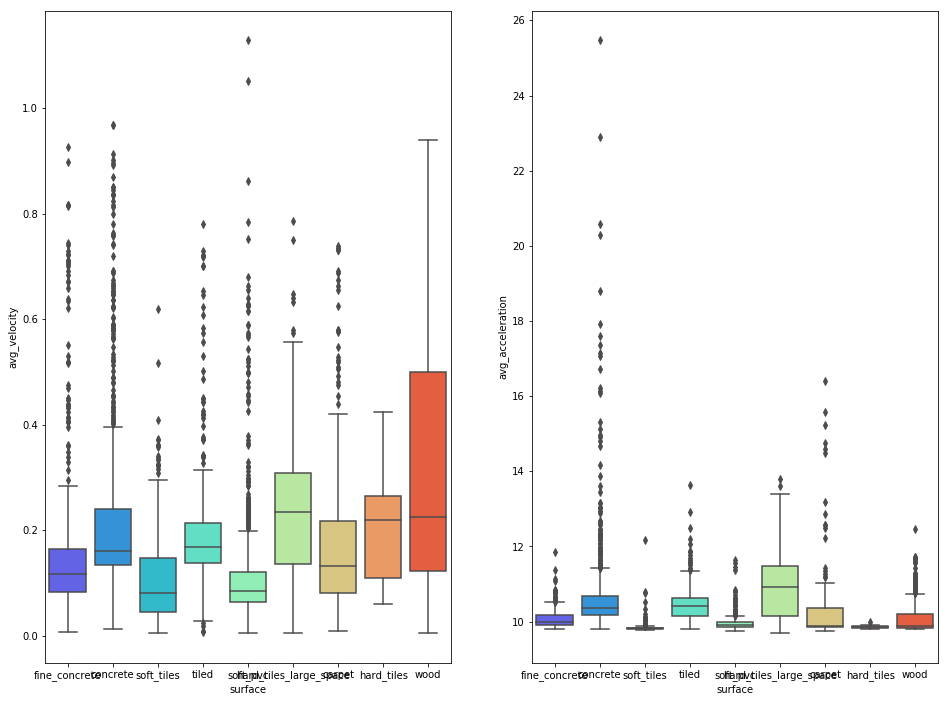

<Figure size 1080x576 with 0 Axes>

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (16, 12))
plt.figure(figsize=(15,8))
sns.boxplot( x ='surface',y = 'avg_velocity', data = new_x_train, palette = 'rainbow', ax=ax[0])
sns.boxplot( x ='surface',y = 'avg_acceleration', data = new_x_train, palette = 'rainbow', ax=ax[1])

the graph below highlighting both velocity and acceleration shows how both are related to each other for both the surface.

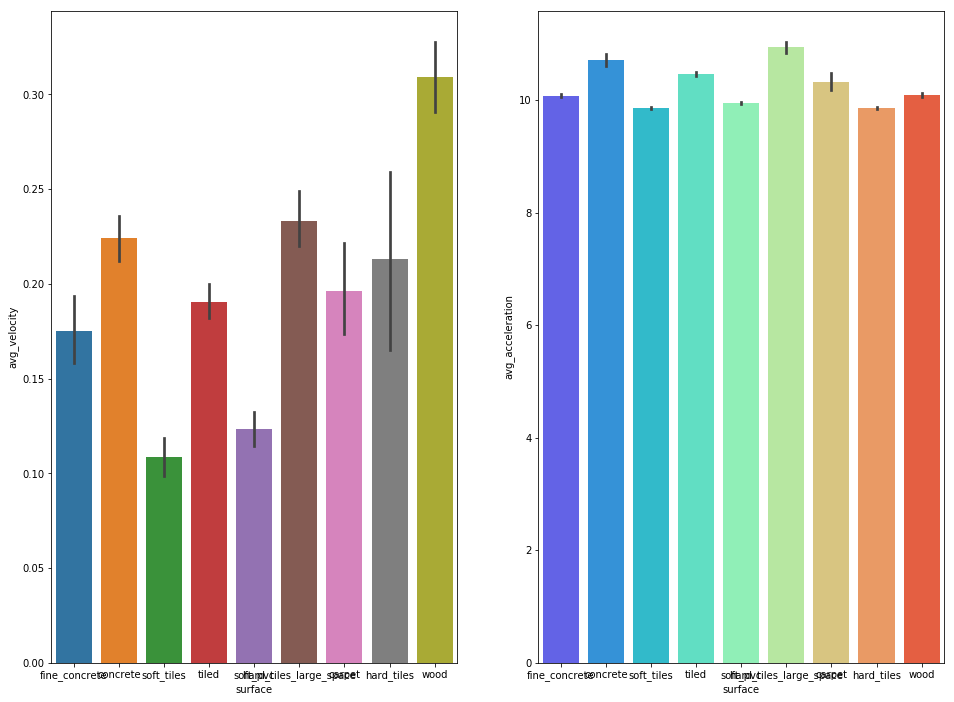

<Figure size 1080x576 with 0 Axes>

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (16, 12))
plt.figure(figsize=(15,8))
sns.barplot( x ='surface',y = 'avg_velocity', data = new_x_train, ax=ax[0])
sns.barplot( x ='surface',y = 'avg_acceleration', data = new_x_train, palette = 'rainbow', ax=ax[1])

In [37]:
surfaces = new_x_train.surface.unique()
surfaces

array(['fine_concrete', 'concrete', 'soft_tiles', 'tiled', 'soft_pvc',
       'hard_tiles_large_space', 'carpet', 'hard_tiles', 'wood'],
      dtype=object)

The below swarmplot helps us in determining how distribution of observation is different in different group ids
for different floor distribution 

For example - concrete has a lot of outliers observations, howver hard tiles has very few obervations and belongs to just 
1 group, whereas for wood average velocity of Robot is generally higher than for other surfaces.

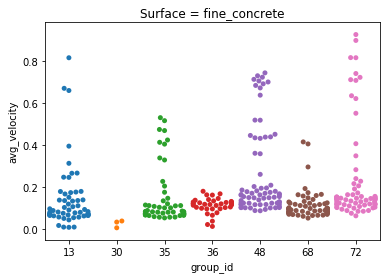

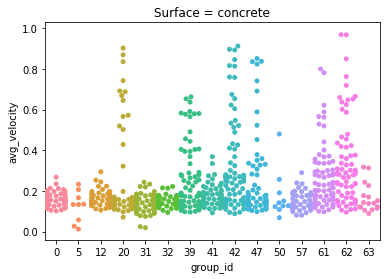

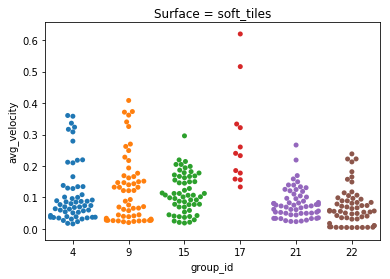

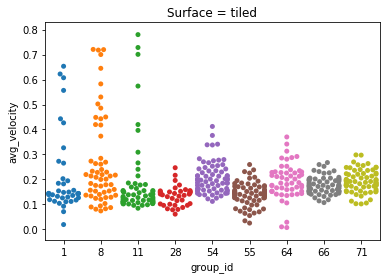

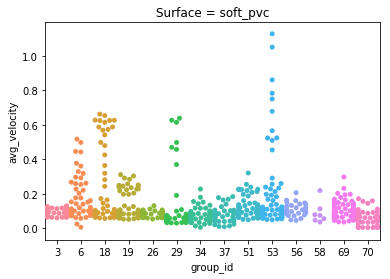

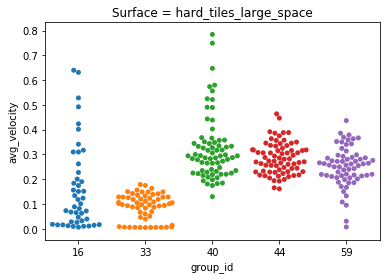

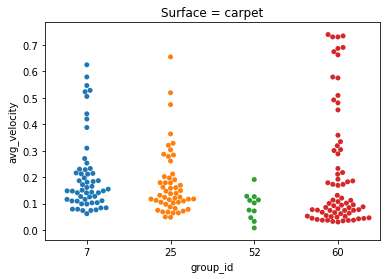

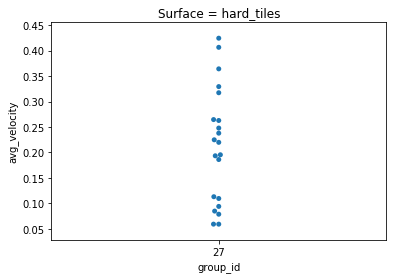

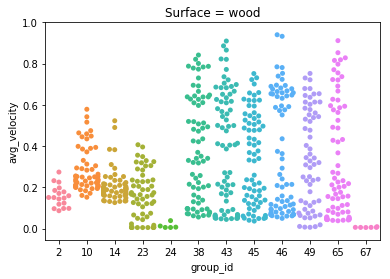

In [38]:
# we need to make swarmplot for every surface showing avg velocity by group id 
for surface in surfaces:
    sns.swarmplot(x=new_x_train[new_x_train.surface == surface]['group_id'],
                  y=new_x_train[new_x_train.surface == surface]['avg_velocity'])
    plt.title('Surface = {}'.format(surface))
    plt.show()

A similar swarmplot for average accelration shows that average acc for fine_concrete doesnt have much outliers, however
it varies greatly for soft_pvc and hard_tiles_large_space

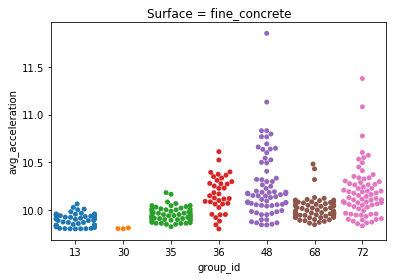

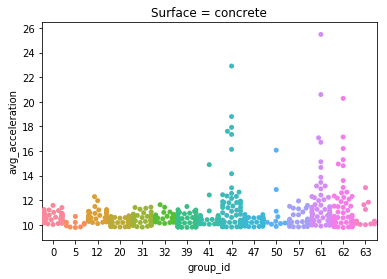

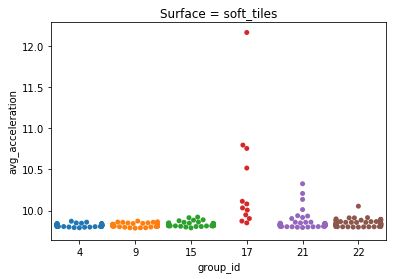

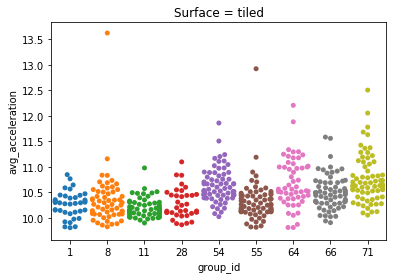

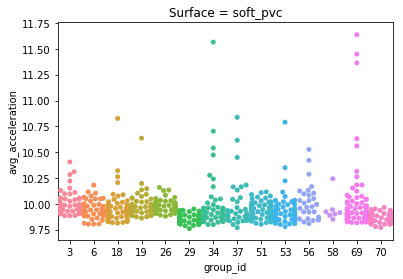

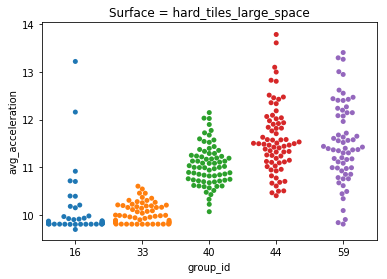

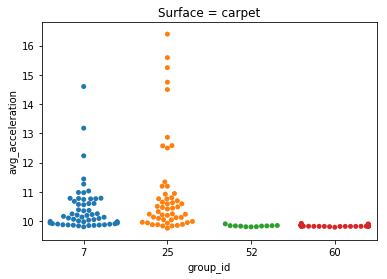

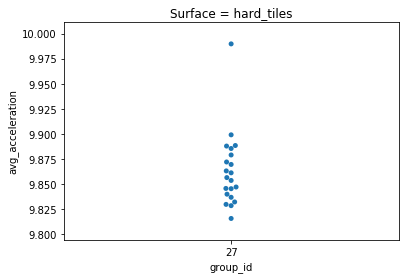

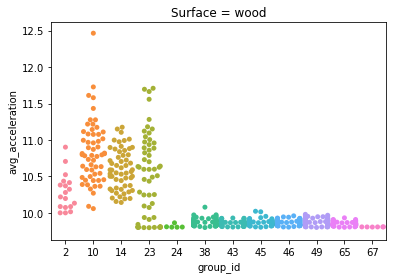

In [39]:
# we need to make swarmplot for every surface showing avg velocity by group id 
for surface in surfaces:
    sns.swarmplot(x=new_x_train[new_x_train.surface == surface]['group_id'],
                  y=new_x_train[new_x_train.surface == surface]['avg_acceleration'])
    plt.title('Surface = {}'.format(surface))
    plt.show()

A scatterplot with a superimposed regression line between average velocity and acceleration is really informative 
as it depicts the true nature between these two important variable for every floor type

For example - for wood, they are inversely proportional but for carpet, concrete and hard tiles they look 
directly proprotional. 

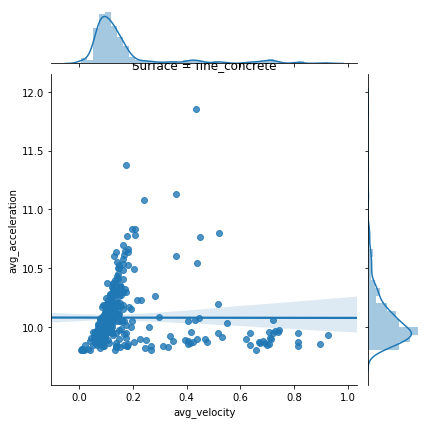

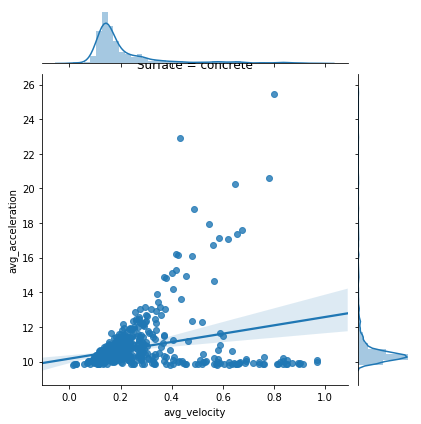

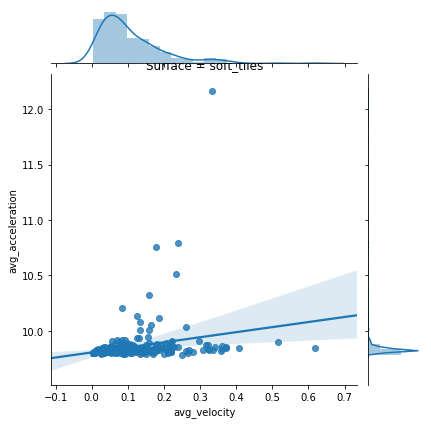

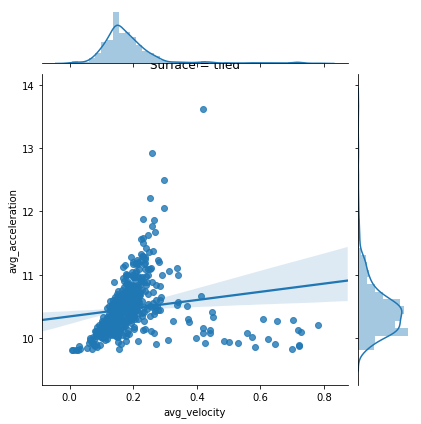

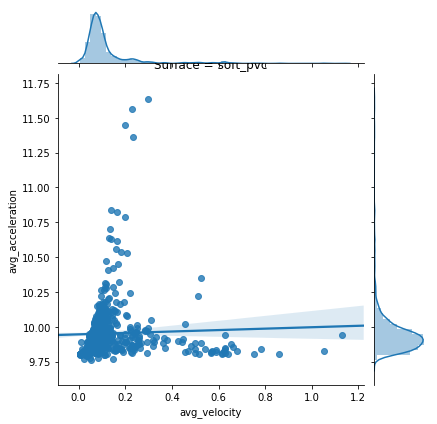

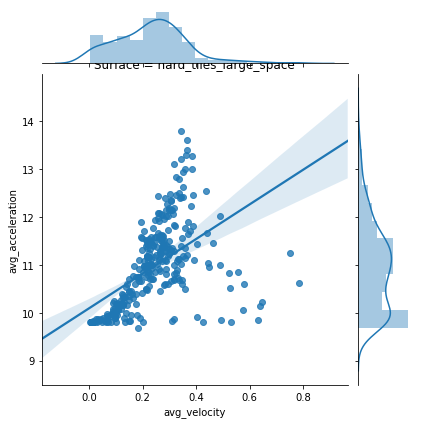

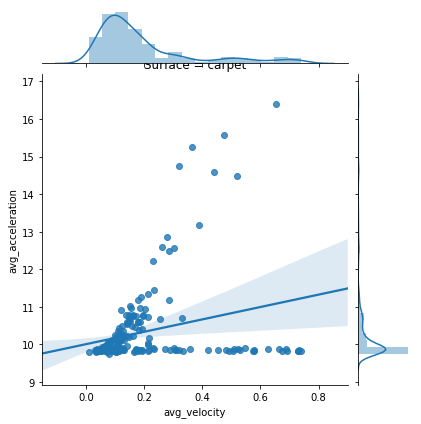

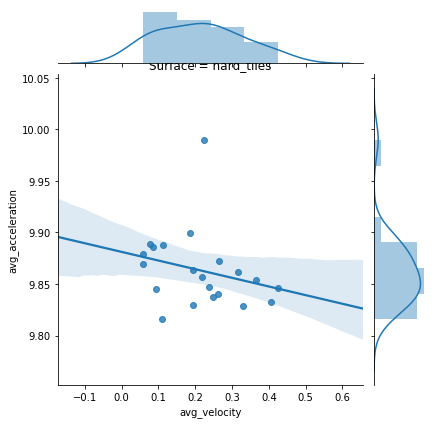

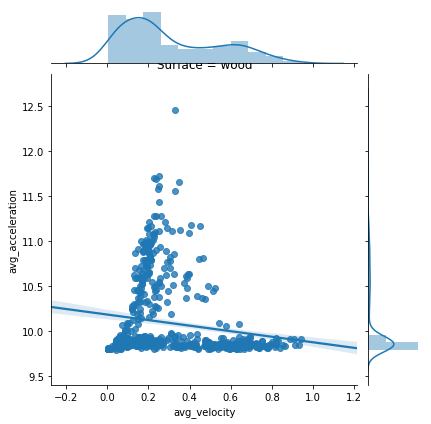

In [40]:
surfaces = new_x_train.surface.unique()
for surface in surfaces:
    sns.jointplot(x= 'avg_velocity', y = 'avg_acceleration', data =new_x_train[new_x_train.surface == surface], kind = 'reg')
    plt.title('Surface = {}'.format(surface))
    plt.show()

In [41]:
# pairwise correlation
x_train_2.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [42]:
x_train_2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

AttributeError: module 'seaborn' has no attribute 'plt'

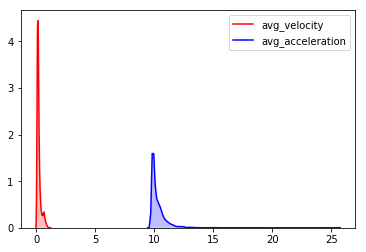

In [43]:

# plot of 2 variables
p1=sns.kdeplot(new_x_train['avg_velocity'], shade=True, color="r")
p1=sns.kdeplot(new_x_train['avg_acceleration'], shade=True, color="b")
sns.plt.show()


In [44]:
new_x_train['avg_velocity'].corr(new_x_train['avg_acceleration'])
 


0.199426677879406

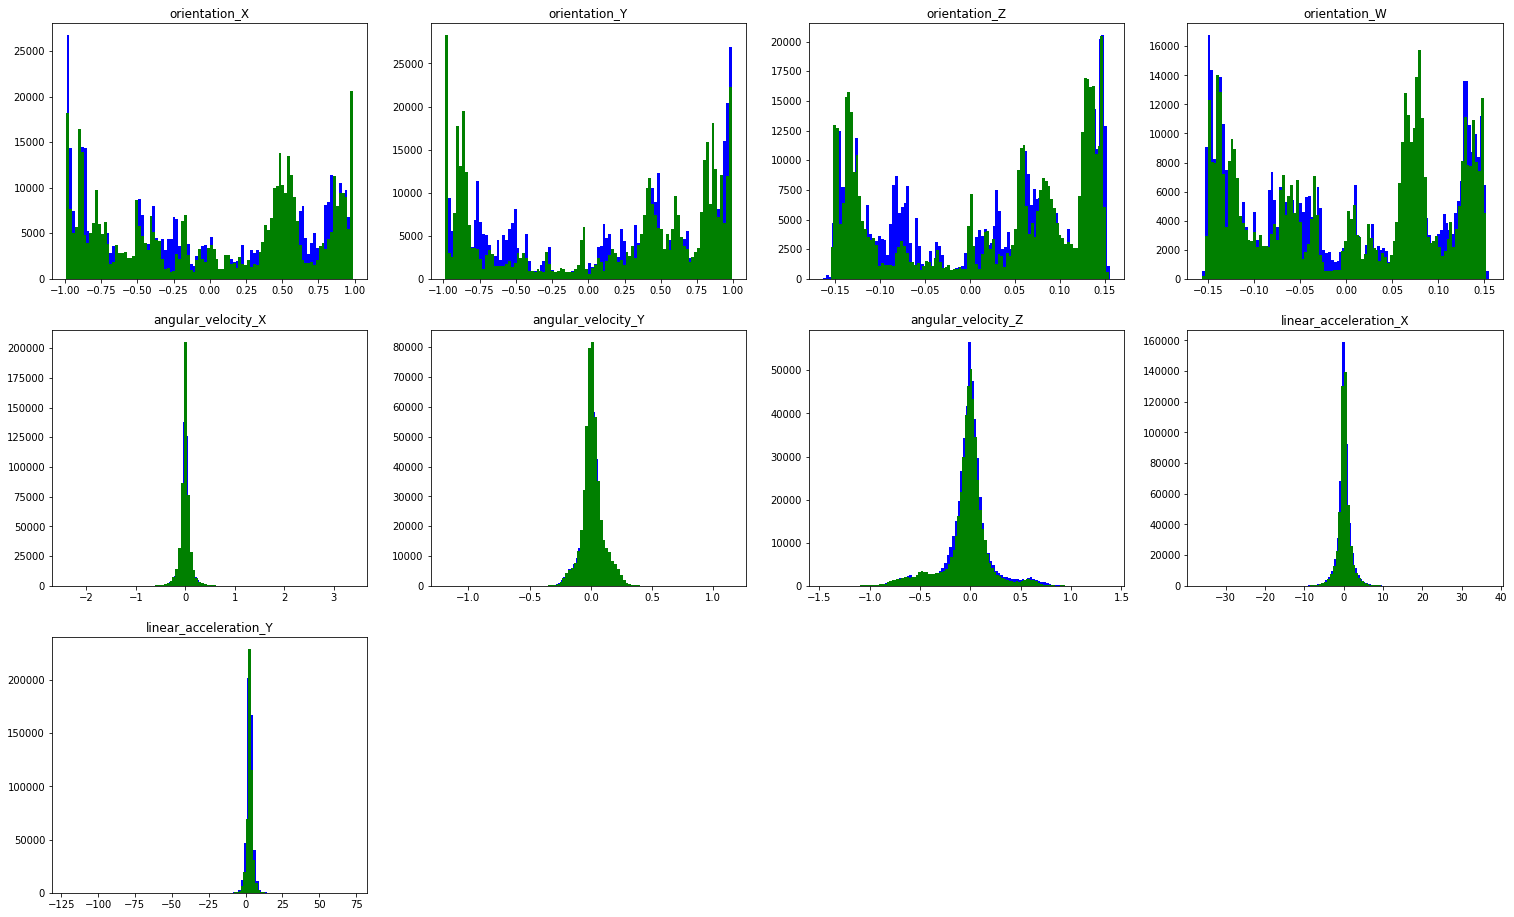

In [45]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(x_train.columns[3:12]):
    plt.subplot(3, 4, i + 1)
    plt.hist(x_train[col], color='blue', bins=100)
    plt.hist(test[col], color='green', bins=100)
    plt.title(col)

In [46]:
x_train.columns[3:12]

Index(['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W',
       'angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z',
       'linear_acceleration_X', 'linear_acceleration_Y'],
      dtype='object')